# Iris- CaseStudy

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [1]:
#Import all the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [3]:
# Get the Data

In [4]:
cols = ["Sepal-length", "Sepal-width", "Petal-length", "Petal-width", "Class"]
iris= pd.read_csv("iris.data",header= None,names=cols)
iris.head()

,Sepal-length,Sepal-width,Petal-length,Petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal-length  150 non-null    float64
 1   Sepal-width   150 non-null    float64
 2   Petal-length  150 non-null    float64
 3   Petal-width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,Sepal-length,Sepal-width,Petal-length,Petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we can interpret from describe method that Minimum Sepal-length is 4.3 and Maximum 7.9. 
We can also see that avg. Sepal-width is 3.05.
mimimum Petal-width  0.1.

In [7]:
iris.groupby("Class").size()

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

All the three species have same number of data.

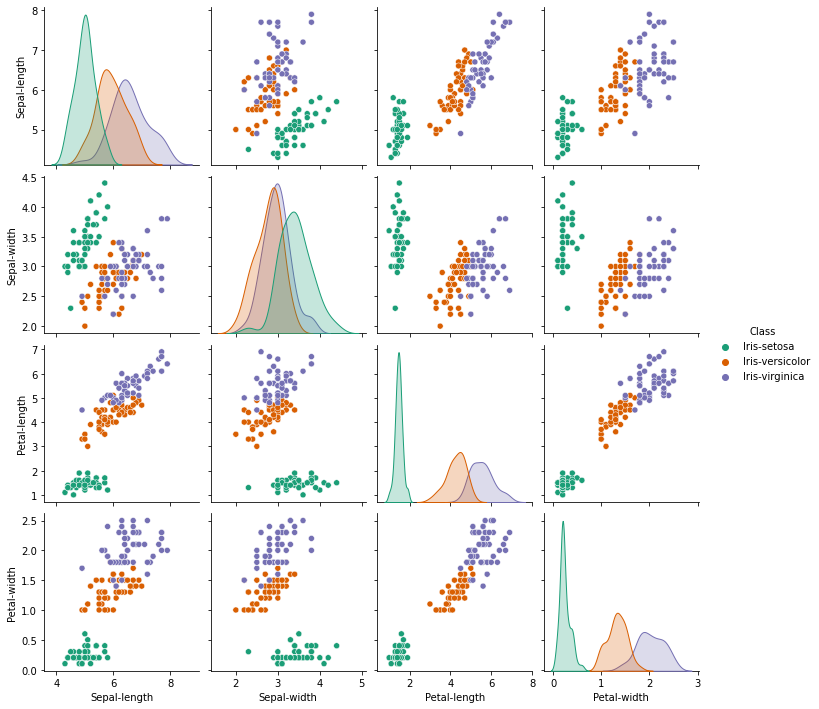

In [8]:
sns.pairplot(iris,hue="Class",palette="Dark2")

For target that is class we can see three diffrent cluster for three species.
There is linear relation of Petal-length with Petal-width.

# Seperate X and Y

In [9]:
x=iris.iloc[:,:-1].values
y=iris.iloc[:,-1].values

# Train,Test,Split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

# Model Creation and Model Prediction

In [11]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    
    cr = classification_report(ytest,ypred)
    
    print(f"Accuracy : {ac}\n\nClassification Report\n{cr}")

In [12]:
models = []
models.append(("Logreg    -:",LogisticRegression()))
models.append(("KNN       -:",KNeighborsClassifier()))
models.append(("SVM-l     -:",SVC(kernel="linear",probability=True)))
models.append(("SVM-r     -:",SVC(probability=True)))
models.append(("DT-g     -:",DecisionTreeClassifier(criterion='gini')))
models.append(("DT-e     -:",DecisionTreeClassifier(criterion='entropy')))


for name,model in models:
    print(name)
    mymodel(model)




Logreg    -:
Accuracy : 0.9736842105263158

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

KNN       -:
Accuracy : 0.9736842105263158

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

SVM-l     -:
Accuracy : 0.9736842105263158

Classification Repor

# Naive Aggregating

In [13]:
from sklearn.ensemble import VotingClassifier

# Hard Voting

In [14]:
vch= VotingClassifier(estimators=models)
vch.fit(xtrain,ytrain)
ypred = vch.predict(xtest)

In [15]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Soft Voting

In [16]:
vcs= VotingClassifier(estimators=models,voting="soft")
vcs.fit(xtrain,ytrain)
ypred = vcs.predict(xtest)

In [17]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Boostrap Aggregation

# Bagging

For LogisticRegression

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
bgl = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=100,random_state=0)

In [20]:
bgl.fit(xtrain,ytrain)
ypred= bgl.predict(xtest)

In [21]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



For Support vector Classifier

In [22]:
bgs = BaggingClassifier(SVC(),n_estimators=10,max_samples=100,random_state=0)

In [23]:
bgs.fit(xtrain,ytrain)
ypred= bgs.predict(xtest)

In [24]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



For Support vector Classifier with linear kernel

In [25]:
bgsl = BaggingClassifier(SVC(kernel="linear"),n_estimators=10,max_samples=100,random_state=0)

In [26]:
bgsl.fit(xtrain,ytrain)
ypred= bgsl.predict(xtest)

In [27]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



For DecisionTreeClassifier with gini criterion

In [28]:
bgdtg = BaggingClassifier(DecisionTreeClassifier(criterion='gini'),n_estimators=10,max_samples=100,random_state=0)

In [29]:
bgdtg.fit(xtrain,ytrain)
ypred= bgdtg.predict(xtest)

In [30]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



For DecisionTreeClassifier with entropy criterion

In [31]:
bgdte = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=10,max_samples=100,random_state=0)

In [32]:
bgdte.fit(xtrain,ytrain)
ypred= bgdte.predict(xtest)

In [33]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf= RandomForestClassifier(max_samples=100,random_state=0)


In [36]:
rf.fit(xtrain,ytrain)
ypred= rf.predict(xtest)

In [37]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Boosting

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
abc=AdaBoostClassifier(n_estimators=100)
abc.fit(xtrain,ytrain)
ypred= abc.predict(xtest)

In [40]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.80      1.00      0.89        16
 Iris-virginica       1.00      0.56      0.71         9

       accuracy                           0.89        38
      macro avg       0.93      0.85      0.87        38
   weighted avg       0.92      0.89      0.89        38



In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100)
gbc.fit(xtrain,ytrain)
ypred= gbc.predict(xtest)

In [42]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



# Conclusion:

I have done this Iris Data set analysis for future prediction of species.
If any new sample of flower came for identification this project will help to understand which species  it belongs to.
